In [1]:
import numpy as np
import skimage.data as data
import matplotlib.pyplot as plt

# 9.1) 
5x5 lik bir matrisi 


`h = [0,1,0 :
      1,1,1 : 
      0,1,0] `


matrisi ile 2 boyutlu konvolüsyonunu:

## a) spatial domain'de hesaplayın

In [2]:
def padding(img, kernel):
    # Padding size
    pad = (kernel.shape[0] - 1) // 2
    # Padding
    img_pad = np.pad(img, pad_width=pad, mode='constant', constant_values=0)
    return img_pad

In [3]:
def conv2d(img, kernel):
    """
    2D convolution
    """
    # padding
    img = padding(img, kernel)

    # Output image
    img_conv = np.zeros_like(img)

    # Loop over every pixel of the image
    for i in range(pad, img.shape[0] - pad):
        for j in range(pad, img.shape[1] - pad):
            # Convolution operation
            img_conv[i, j] = np.sum(img[i - pad:i + pad + 1, j - pad:j + pad + 1] * kernel)

    return img_conv

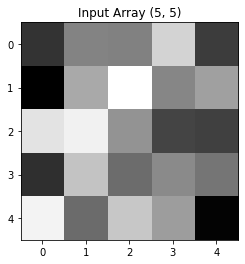

In [4]:
input_array = np.random.randint(0, 255, size=(5, 5))
kernel = np.array([
                   [0, 1, 0], 
                   [1, 1, 1], 
                   [0, 1, 0]
                ])

plt.imshow(input_array, cmap='gray')
plt.title(f'Input Array {input_array.shape}')
plt.show()

In [5]:
conv_result = conv2d(input_array, kernel)
plt.imshow(conv_result, cmap='gray')
plt.title(f'Convolution Result {conv_result.shape}')

NameError: name 'pad' is not defined

## b) frekans bölgesinde hesaplayın.
fft ve ifft dışında konvolüsyonu kendiniz yazın.
sonuçları karşılaştırın.
Sıfır eklemeyi unutmayın.

In [ ]:
def fourier_conv2d(img, kernel):

    size = np.array(input_array.shape) + np.array(kernel.shape) - 1

    fsize = 2 ** np.ceil(np.log2(size)).astype(int)
    fslice = tuple([slice(0, int(sz)) for sz in size])

    input_array_f = np.fft.fft2(input_array , fsize)
    kernel_f = np.fft.fft2(kernel , fsize)
    result = np.fft.ifft2(input_array_f*kernel_f)[fslice].copy()
    return np.array(result.real, dtype=np.uint8)

In [ ]:
result = fourier_conv2d(input_array, kernel)
plt.imshow(result, cmap='gray')

# 9.2)


In [11]:
def fourier_low_pass_filter(img, d0):
    """
    Fourier low pass filter
    """
    # Calculate the size of the image
    size = np.array(img.shape)
    # Calculate the size of the filter
    fsize = 2 ** np.ceil(np.log2(size)).astype(int)

    # Calculate the center of the filter
    center = (fsize - size) // 2
    # Calculate the distance of the pixel from the center
    dist = lambda i,j: np.sqrt((i - center[0]) ** 2 + (j - center[1]) ** 2)

    d0 = d0 * size[0]/2
    # Create the filter
    filter = np.zeros(fsize, dtype=complex)
    for i in range(size[0]):
        for j in range(size[1]):
            # Calculate the filter value
            filter[i, j] = 1 if dist(i,j) >= d0 else 0
    
    # Fourier transform the image
    img_f = np.fft.fft2(img, fsize)
    # shift the zero frequency component to the center of the filter
    img_f = np.fft.fftshift(img_f)
    # Apply the filter
    result = img_f * filter
    # Shift the zero frequency component back to the top left corner
    result = np.fft.ifftshift(result)
    # Inverse Fourier transform the image
    result = np.fft.ifft2(result).real
    
    return np.array(result, dtype=np.uint8)

In [12]:
img_org = data.camera()
img_filter = fourier_low_pass_filter(img_org, 10)

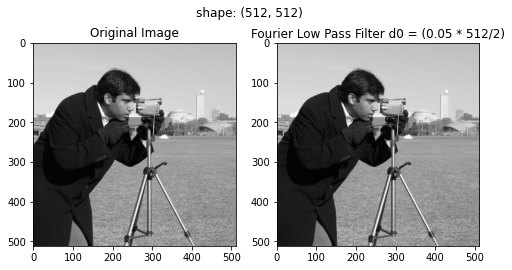

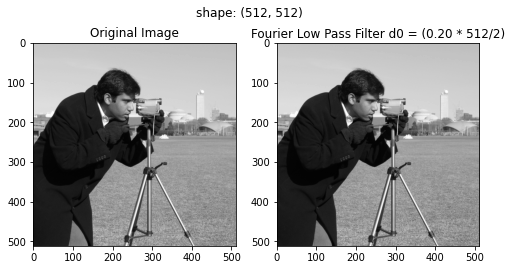

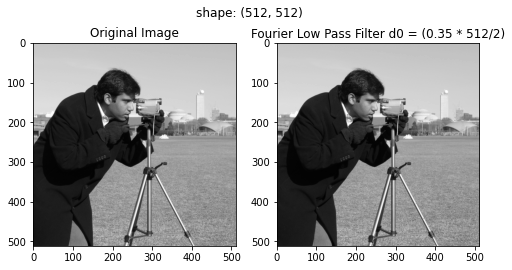

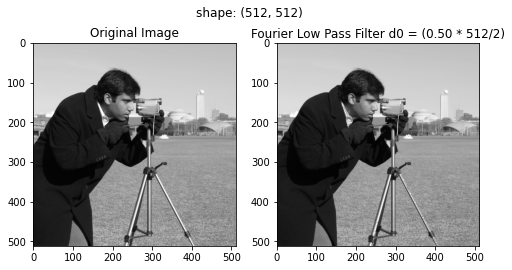

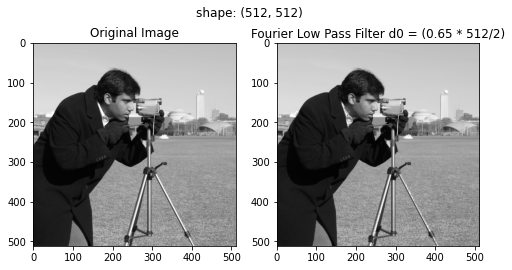

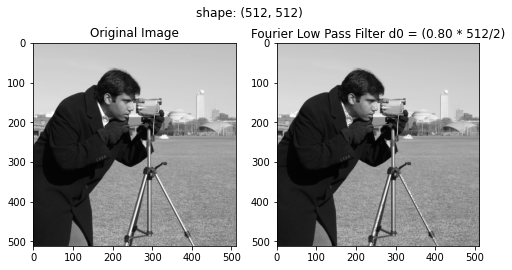

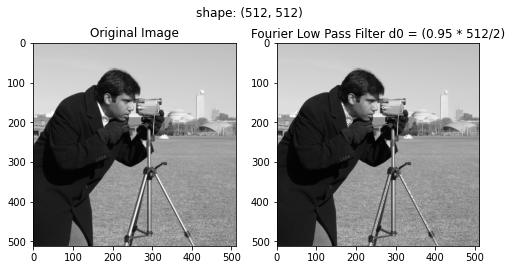

In [14]:
for d0 in np.arange(0.05, 1.0, 0.15):
    img_filter = fourier_low_pass_filter(img_org, d0)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
    fig.suptitle(f'shape: {img_org.shape}')
    ax1.imshow(img_org, cmap='gray')
    ax1.set_title('Original Image')
    ax2.imshow(img_filter, cmap='gray')
    ax2.set_title(f'Fourier Low Pass Filter d0 = ({d0:.2f} * {img_org.shape[0]}/2)')
    plt.show()